In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reading out the data with read_csv() function and printing out the first 5 values of the .csv file

In [ ]:
data = pd.read_csv('spam_ham_dataset.csv',encoding='latin-1')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


dropping a column 'Unnamed: 0' as it is not required and renaming the column names

In [ ]:
data = data.drop(["Unnamed: 0"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text", "v3":"label_num"})
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


counting the number of spam and ham values

In [ ]:
data.label.value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

finding the length of the each text and creating a separate column with the respective length values

In [ ]:
data['length'] = data['text'].apply(len)
data.head()

,label,text,label_num,length
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


splitting the data into training and testing sets

In [ ]:
X = data['text']
Y = data['label_num']
from sklearn.model_selection import train_test_split as tt
X_train, X_test, Y_train, Y_test = tt(X, Y,test_size=0.2, random_state=100)

Determining the shape of the traning set

In [ ]:
X_train.shape

(4136,)

Determining the shape of the testing set

In [ ]:
X_test.shape

(1035,)

Dropping down the words that are not present in english dictionaries as those words give out unnecessary errors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(stop_words ='english')
vector.fit(X_train)

CountVectorizer(stop_words='english')

printing out the frequency of each word with vector.vocabulary_

In [ ]:
vector.vocabulary_

{'subject': 38280,
 'day': 13745,
 'change': 10647,
 'revision': 34637,
 'hpl': 21784,
 'nom': 29171,
 'february': 17976,
 '10': 231,
 '2001': 993,
 'attached': 6714,
 'file': 18201,
 'hplno': 21790,
 '210': 1063,
 'xls': 43362,
 'fyi': 19211,
 'just': 24225,
 'wanted': 42219,
 'let': 25495,
 'know': 24724,
 'entex': 16793,
 'information': 22821,
 'following': 18621,
 'directory': 14834,
 'logistics': 25968,
 'reference': 33971,
 'tab': 38824,
 'historical': 21415,
 'volumes': 41991,
 'risk': 34849,
 'folder': 18603,
 'erms': 17034,
 'intra': 23179,
 'texas': 39347,
 'databases': 13699,
 'think': 39505,
 'need': 28787,
 'ac': 4385,
 'et': 17166,
 'vi': 41681,
 'codin': 11595,
 'le': 25304,
 'ally': 5449,
 'baronial': 7384,
 'fy': 19208,
 'dmabi': 15172,
 'hey': 21258,
 'ofore': 29724,
 'phacy': 31266,
 'specials': 37493,
 'viin': 41777,
 'van': 41432,
 'ax': 7030,
 'tariff': 38996,
 'pleaove': 31739,
 'taunt': 39021,
 'accompaniment': 4439,
 'yjhanl': 43626,
 'pactwmtnfbiiw': 30480,
 '

training the model with the final vector inputs
vector.transform is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [ ]:
X_train_transformed =vector.transform(X_train)
X_test_transformed =vector.transform(X_test)

importing the multinomial naive Bayes libraries from sklearn and predicting the transformed x_train values

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_transformed,Y_train)
y_pred = model.predict(X_test_transformed)
y_pred_prob = model.predict_proba(X_test_transformed)

importing confusion matrix from sklearn.metrics and the printing the confusion matrix for the model

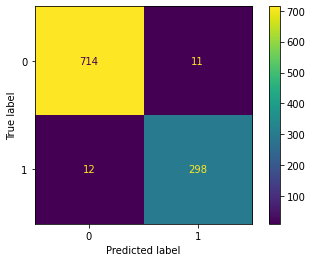

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

evaluating the accuracy for the model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9777777777777777

getting tp, fp, fn, tn values from the confusion matrix
1.	714 predicted values match the actual values and the actual value was negative and the model predicted a negative value
2.	11 predicted values was falsely predicted and the actual value was negative but the model predicted a positive value
3.	12 predicted values was falsely predicted and the actual value was positive but the model predicted a negative value
4.	298 predicted values match the actual values and the actual value was positive and the model predicted a positive value


In [ ]:
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]

evaluating the prevalence value

In [ ]:
prevalence = (FN+TP)/(FN+TP+FP+TN)
prevalence

0.2995169082125604

plotting the ROC curve and determining the accuracy, sensitivity, specificity for y_test and y_pred_prob cases

In [ ]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob[:,1])
specificity = 1-false_positive_rate
acc = true_positive_rate*prevalence + specificity*(1-prevalence)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9940533926585094

Obtained accuracy values

In [ ]:
acc         #for accuracy

array([0.70048309, 0.8821256 , 0.88695652, 0.88888889, 0.93333333,
       0.93236715, 0.9352657 , 0.93429952, 0.94589372, 0.94492754,
       0.96811594, 0.96714976, 0.97777778, 0.97681159, 0.97874396,
       0.97777778, 0.97971014, 0.97777778, 0.97874396, 0.98164251,
       0.98357488, 0.98454106, 0.98164251, 0.9826087 , 0.97874396,
       0.97971014, 0.97294686, 0.97391304, 0.9468599 , 0.94492754,
       0.91014493, 0.90821256, 0.88502415, 0.88309179, 0.83478261,
       0.83285024, 0.74782609, 0.74589372, 0.66183575, 0.6589372 ,
       0.63864734, 0.63671498, 0.62898551, 0.62705314, 0.57294686,
       0.57101449, 0.49178744, 0.48985507, 0.46183575, 0.45990338,
       0.42608696, 0.42415459, 0.42222222, 0.42028986, 0.33140097,
       0.29951691])

Obtained specificity values

In [ ]:
specificity

array([1.        , 0.99310345, 0.99310345, 0.99310345, 0.99310345,
       0.99172414, 0.99172414, 0.99034483, 0.99034483, 0.98896552,
       0.98896552, 0.98758621, 0.98758621, 0.9862069 , 0.9862069 ,
       0.98482759, 0.98482759, 0.98206897, 0.98206897, 0.98206897,
       0.98206897, 0.98206897, 0.97793103, 0.97793103, 0.97241379,
       0.97241379, 0.96275862, 0.96275862, 0.92413793, 0.92137931,
       0.87172414, 0.86896552, 0.83586207, 0.83310345, 0.76413793,
       0.76137931, 0.64      , 0.63724138, 0.51724138, 0.51310345,
       0.48413793, 0.48137931, 0.47034483, 0.46758621, 0.39034483,
       0.38758621, 0.27448276, 0.27172414, 0.23172414, 0.22896552,
       0.18068966, 0.17793103, 0.17517241, 0.17241379, 0.04551724,
       0.        ])

Obtained sensitivity values

In [ ]:
true_positive_rate    #for sensitivity

array([0.        , 0.62258065, 0.63870968, 0.64516129, 0.79354839,
       0.79354839, 0.80322581, 0.80322581, 0.84193548, 0.84193548,
       0.91935484, 0.91935484, 0.95483871, 0.95483871, 0.96129032,
       0.96129032, 0.96774194, 0.96774194, 0.97096774, 0.98064516,
       0.98709677, 0.99032258, 0.99032258, 0.99354839, 0.99354839,
       0.99677419, 0.99677419, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

Threshold values

In [ ]:
thresholds

array([2.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       9.99999698e-001, 9.99999662e-001, 9.99997646e-001, 9.99995971e-001,
       9.99887732e-001, 9.99854129e-001, 9.64318561e-001, 9.63640697e-001,
       7.60878788e-001, 6.91198611e-001, 5.87832027e-001, 5.73800610e-001,
       3.57732746e-001, 2.89721818e-001, 2.61934555e-001, 1.54750218e-001,
       1.48746711e-001, 1.43717043e-001, 1.77128223e-002, 1.00502862e-002,
       1.68842677e-003, 1.58248547e-003, 5.02538042e-004, 3.73038719e-004,
       1.37764650e-007, 7.70930334e-008, 2.35832810e-013, 1.68277775e-013,
       3.25526402e-016, 3.05224389e-016, 6.82301599e-021, 6.72551531e-021,
       1.08953328e-024, 1.04654451e-024, 7.38499708e-036, 6.80262408e-036,
       7.40489379e-039, 3.79009474e-039, 9.88879350e-041, 2.36029378e-041,
       1.17052264e-053, 1.16811453e-053, 1.51585408e-078, 5.05772453e-079,
       3.55993852e-098, 1.78633105e-098, 6.11668837e-125, 1.03861836e-125,
       3.76416419e-126, 1

plotting graphs for threshold v/s accuracy, specificity, sensitivity using matplotlib

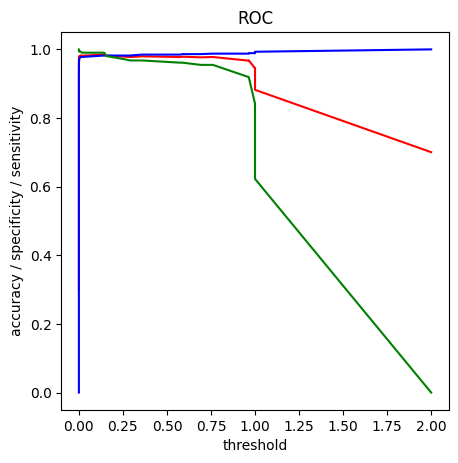

In [ ]:
%matplotlib inline  
plt.figure(figsize=(5,5), dpi=100) 
plt.xlabel('threshold')
plt.title('ROC')
plt.ylabel('accuracy / specificity / sensitivity') 
plt.plot(thresholds, acc, color='r', linestyle='-', label='accuracy')  
plt.plot(thresholds,specificity, color='b', linestyle='-', label='specificity')
plt.plot(thresholds,true_positive_rate, color='g', linestyle='-', label='sensitivity')

# red - accuracy
# blue - specificity
# green - sensitivity

calculating mean for y_test dataset

In [ ]:
y_test_mean = Y_test.mean()
y_test_mean

0.2995169082125604

calculating mean for y_pred_prob dataset

In [ ]:
y_pred_mean = y_pred_prob.mean()
y_pred_mean

0.5

plotting bar graph for means (obtained from y_test and y_pred_prob) and for classified andd unclassified dataset

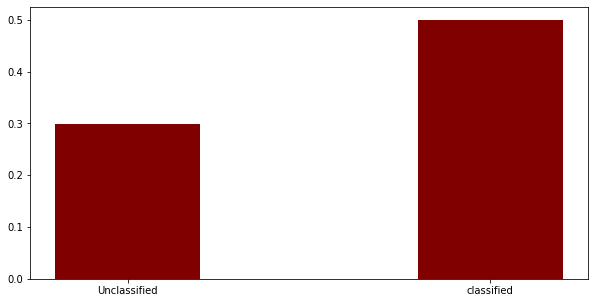

In [ ]:
y_mean = [y_test_mean, y_pred_mean]
x_mean = ['Unclassified', 'classified']
fig = plt.figure(figsize = (10, 5))
plt.bar(x_mean, y_mean, color ='maroon', width = 0.4)
plt.show()